In [ ]:
import requests
from bs4 import BeautifulSoup
import tensorflow as tf
import json
import numpy as np
from fuzzywuzzy import fuzz

In [ ]:
# links
understat = {
    'match_link': 'https://understat.com/match/',
    '22/23': {
        'EPL': 'https://understat.com/league/EPL/2022',
        'Serie A': 'https://understat.com/league/Serie_A/2022',
        'La liga': 'https://understat.com/league/La_liga/2022',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2022',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2022'
    }, 
    '21/22': {
        'EPL': 'https://understat.com/league/EPL/2021',
        'Serie A': 'https://understat.com/league/Serie_A/2021',
        'La liga': 'https://understat.com/league/La_liga/2021',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2021',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2021'
    },
    '20/21': {
        'EPL': 'https://understat.com/league/EPL/2020',
        'Serie A': 'https://understat.com/league/Serie_A/2020',
        'La liga': 'https://understat.com/league/La_liga/2020',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2020',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2020'
    },
    '19/20': {
        'EPL': 'https://understat.com/league/EPL/2019',
        'Serie A': 'https://understat.com/league/Serie_A/2019',
        'La liga': 'https://understat.com/league/La_liga/2019',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2019',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2019'
    },
    '18/19': {
        'EPL': 'https://understat.com/league/EPL/2018',
        'Serie A': 'https://understat.com/league/Serie_A/2018',
        'La liga': 'https://understat.com/league/La_liga/2018',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2018',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2018'
    },
    '17/18': {
        'EPL': 'https://understat.com/league/EPL/2018',
        'Serie A': 'https://understat.com/league/Serie_A/2017',
        'La liga': 'https://understat.com/league/La_liga/2017',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2017',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2017'
    },
    '16/17': {
        'EPL': 'https://understat.com/league/EPL/2016',
        'Serie A': 'https://understat.com/league/Serie_A/2016',
        'La liga': 'https://understat.com/league/La_liga/2016',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2016',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2016'
    },
    '15/16': {
        'EPL': 'https://understat.com/league/EPL/2015',
        'Serie A': 'https://understat.com/league/Serie_A/2015',
        'La liga': 'https://understat.com/league/La_liga/2015',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2015',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2015'
    },
    '14/15': {
        'EPL': 'https://understat.com/league/EPL/2014',
        'Serie A': 'https://understat.com/league/Serie_A/2014',
        'La liga': 'https://understat.com/league/La_liga/2014',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2014',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2014'
    },
}
# enums
HOME, AWAY = 0, 1
DRAW, WON, LOST = 0, 1, 2
W_PTS, D_PTS, L_PTS = 3, 1, 0

In [ ]:
def get_match_stat(id : str) :
    url = understat['match_link'] + id
    res = requests.get(url)

    soup = BeautifulSoup(res.content, 'html.parser')
    stat_divs = soup.find_all('div', class_=['progress-title', 'progress-value'])

    stats = {}
    home_team_stats = {'h/a': HOME}
    away_team_stats = {'h/a': AWAY}

    for i in range(len(stat_divs)) :
        if (stat_divs[i].get('class')[0] != 'progress-title') : continue
        
        home_team_stats[stat_divs[i].text] = stat_divs[i + 1].text
        away_team_stats[stat_divs[i].text] = stat_divs[i + 2].text
        
        if (stat_divs[i].text != 'GOALS') : continue

        if (int(stat_divs[i + 1].text) > int(stat_divs[i + 2].text)) :
            home_team_stats['RESULT'] = WON
            away_team_stats['RESULT'] = LOST
            home_team_stats['POINTS'] = W_PTS
            away_team_stats['POINTS'] = L_PTS
        elif (int(stat_divs[i + 1].text) < int(stat_divs[i + 2].text)) :
            home_team_stats['RESULT'] = LOST
            away_team_stats['RESULT'] = WON
            home_team_stats['POINTS'] = L_PTS
            away_team_stats['POINTS'] = W_PTS
        else :
            home_team_stats['RESULT'] = DRAW
            away_team_stats['RESULT'] = DRAW
            home_team_stats['POINTS'] = D_PTS
            away_team_stats['POINTS'] = D_PTS
        
    stats['Home Team'] = home_team_stats
    stats['Away Team'] = away_team_stats 

    return stats
    

In [ ]:
print(get_match_stat('88'))

{'Home Team': {'h/a': 0, 'TEAMS': 'Arsenal', 'CHANCES': '58%', 'GOALS': '0', 'RESULT': 2, 'POINTS': 0, 'xG': '1.33', 'SHOTS': '22', 'SHOTS ON TARGET': '6', 'DEEP': '11', 'PPDA': '8.17', 'xPTS': '2.01'}, 'Away Team': {'h/a': 1, 'TEAMS': 'West Ham', 'CHANCES': '28%', 'GOALS': '2', 'RESULT': 1, 'POINTS': 3, 'xG': '0.54', 'SHOTS': '8', 'SHOTS ON TARGET': '4', 'DEEP': '0', 'PPDA': '12.45', 'xPTS': '0.71'}}


In [ ]:
def get_match_ids(url : str) :
    res = requests.get(url)

    soup = BeautifulSoup(res.content, 'lxml')
    scripts = soup.find_all('script')
    strings = scripts[1].string

    ind_start = strings.index("('") + 2
    ind_end = strings.index("')")

    json_data = strings[ind_start : ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')

    data = json.loads(json_data)

    ids = []

    for game in data :
        if (not game['isResult']) : break

        ids.append(game['id'])

    return ids


In [ ]:
print((get_match_ids(understat['21/22']['EPL'])))

['16376', '16377', '16378', '16379', '16380', '16381', '16382', '16383', '16384', '16385', '16386', '16387', '16388', '16389', '16390', '16391', '16392', '16393', '16394', '16395', '16396', '16397', '16398', '16399', '16400', '16401', '16402', '16403', '16404', '16405', '16406', '16407', '16408', '16409', '16410', '16411', '16412', '16413', '16414', '16415', '16416', '16417', '16418', '16419', '16420', '16421', '16422', '16423', '16424', '16425', '16426', '16431', '16427', '16428', '16429', '16430', '16432', '16433', '16434', '16435', '16442', '16437', '16438', '16440', '16445', '16436', '16439', '16443', '16444', '16441', '16455', '16447', '16450', '16451', '16453', '16454', '16448', '16449', '16452', '16446', '16456', '16459', '16460', '16461', '16462', '16464', '16458', '16457', '16465', '16463', '16468', '16467', '16469', '16470', '16471', '16474', '16473', '16472', '16466', '16475', '16484', '16483', '16477', '16479', '16480', '16478', '16476', '16481', '16482', '16485', '16488', 

In [ ]:
def gather(league : str) :
    ids = []
    for key, value in understat.items() :
        if (key == 'match_link') : continue
        ids = ids + get_match_ids(value[league])
    return ids

EPL_ids = gather('EPL')
Serie_A_ids = gather('Serie A')
La_Liga_ids = gather('La liga')
Bundes_ids = gather('Bundesliga')
Ligue1_ids = gather('Ligue 1')

all_ids = EPL_ids + Serie_A_ids + La_Liga_ids + Bundes_ids + Ligue1_ids

In [ ]:
print(len(EPL_ids), len(Serie_A_ids), len(La_Liga_ids), len(Bundes_ids), len(Ligue1_ids), sep=' / ')
print('Total:', len(all_ids))

3100 / 3269 / 3259 / 2637 / 3179
Total: 15444


In [ ]:
class Club :
    def __init__(self, club : str) :
        self.index = 0
        self.last_5, self.last_10, self.last_15, self.last_25, self.last_38 = [], [], [], [], []
        self.club = club

    def push_stat(self, stat) :
        if (self.index >= 5) :
            self.last_5.pop()
        self.last_5.append(stat)

        if (self.index >= 10) :
            self.last_10.pop()
        self.last_10.append(stat)

        if (self.index >= 15) :
            self.last_15.pop()
        self.last_15.append(stat)
        
        if (self.index >= 25) :
            self.last_25.pop()
        self.last_25.append(stat)

        if (self.index >= 38) :
            self.last_38.pop()
        self.last_38.append(stat)

        self.index += 1
    
    def summarize_last_5(self) :
        sum_last_5 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        for stat in self.last_5 :
            for i in range(len(stat)) :
                sum_last_5[i] += stat[i]
        for i in range(len(sum_last_5)) :
            sum_last_5[i] /= len(self.last_5)
        return sum_last_5
    def summarize_last_10(self) :
        sum_last_10 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        for stat in self.last_10 :
            for i in range(len(stat)) :
                sum_last_10[i] += stat[i]
        for i in range(len(sum_last_10)) :
            sum_last_10[i] /= len(self.last_10)
        return sum_last_10
    def summarize_last_15(self) :
        sum_last_15 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        for stat in self.last_15 :
            for i in range(len(stat)) :
                sum_last_15[i] += stat[i]
        for i in range(len(sum_last_15)) :
            sum_last_15[i] /= len(self.last_15)
        return sum_last_15
    def summarize_last_25(self) :
        sum_last_25 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        for stat in self.last_25 :
            for i in range(len(stat)) :
                sum_last_25[i] += stat[i]
        for i in range(len(sum_last_25)) :
            sum_last_25[i] /= len(self.last_25)
        return sum_last_25
    def summarize_last_38(self) :
        sum_last_38 = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
        for stat in self.last_38 :
            for i in range(len(stat)) :
                sum_last_38[i] += stat[i]
        for i in range(len(sum_last_38)) :
            sum_last_38[i] /= len(self.last_38)
        return sum_last_38

    def ready(self) :
        if (len(self.last_38) == 38) : return True
        return False

    def get_stat(self) :
        return self.last_5 + self.last_10 + self.last_15 + self.last_25 + self.last_38


In [ ]:
def get_all_clubs(url) :
    clubs = []
    res = requests.get(url)

    soup = BeautifulSoup(res.content, 'lxml')
    scripts = soup.find_all('script')
    strings = scripts[1].string

    ind_start = strings.index("('") + 2
    ind_end = strings.index("')")

    json_data = strings[ind_start : ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')

    data = json.loads(json_data)
    for i in range(10) :
        clubs.append(data[i]['h']['title'])
        clubs.append(data[i]['a']['title'])
    return set(clubs)

all_clubs = []
for key, value in understat.items() :
    if (key == 'match_link') : continue
    for name, link in value.items() :
        all_clubs = all_clubs + list(get_all_clubs(link))
all_clubs = set(all_clubs)
print(list(all_clubs))

['Schalke 04', 'Toulouse', 'Pescara', 'SPAL 2013', 'Real Madrid', 'Bournemouth', 'Brest', 'Parma', 'Hoffenheim', 'Bayern Munich', 'Middlesbrough', 'Hull', 'Brighton', 'Athletic Club', 'Nancy', 'Eibar', 'Genoa', 'Verona', 'Monza', 'Atalanta', 'Crystal Palace', 'Crotone', 'Parma Calcio 1913', 'Sevilla', 'Frosinone', 'Villarreal', 'Hamburger SV', 'Manchester City', 'Rayo Vallecano', 'Napoli', 'Cagliari', 'Sampdoria', 'Levante', 'Girona', 'Nimes', 'Rennes', 'Chievo', 'Swansea', 'Angers', 'Arsenal', 'Bologna', 'Hertha Berlin', 'Cadiz', 'GFC Ajaccio', 'Carpi', 'Almeria', 'Real Betis', 'Lyon', 'Paris Saint Germain', 'Paderborn', 'Real Valladolid', 'Borussia M.Gladbach', 'Udinese', 'Guingamp', 'Elche', 'Marseille', 'Eintracht Frankfurt', 'Cordoba', 'Las Palmas', 'Southampton', 'Greuther Fuerth', 'Fulham', 'Empoli', 'Wolfsburg', 'Auxerre', 'Caen', 'Chelsea', 'Queens Park Rangers', 'Sassuolo', 'Venezia', 'Stoke', 'Mallorca', 'SC Bastia', 'Nantes', 'Lazio', 'Torino', 'RasenBallsport Leipzig', 'No

In [ ]:
print(len(all_clubs))

158


In [ ]:
all_club_dict = {}

for club in all_clubs :
    all_club_dict[club] = Club(club)

print(all_club_dict)

{'Schalke 04': <__main__.Club object at 0x00000269431CB220>, 'Toulouse': <__main__.Club object at 0x00000269431CB7C0>, 'Pescara': <__main__.Club object at 0x00000269431C80A0>, 'SPAL 2013': <__main__.Club object at 0x00000269431C8130>, 'Real Madrid': <__main__.Club object at 0x00000269431C81F0>, 'Bournemouth': <__main__.Club object at 0x00000269431C8250>, 'Brest': <__main__.Club object at 0x00000269431C8370>, 'Parma': <__main__.Club object at 0x00000269431CAFE0>, 'Hoffenheim': <__main__.Club object at 0x00000269431CB040>, 'Bayern Munich': <__main__.Club object at 0x00000269431CB190>, 'Middlesbrough': <__main__.Club object at 0x00000269431CB2E0>, 'Hull': <__main__.Club object at 0x00000269431C85B0>, 'Brighton': <__main__.Club object at 0x00000269431C87F0>, 'Athletic Club': <__main__.Club object at 0x00000269431C8430>, 'Nancy': <__main__.Club object at 0x00000269431C83A0>, 'Eibar': <__main__.Club object at 0x00000269431C82B0>, 'Genoa': <__main__.Club object at 0x00000269431C82E0>, 'Verona

In [ ]:
def format_stats(stat) :
    game = {}
    
    game[stat['Home Team']['TEAMS']] = []
    game[stat['Away Team']['TEAMS']] = []
    
    game[stat['Home Team']['TEAMS']].append(stat['Home Team']['h/a'])
    if (stat['Home Team']['CHANCES'] != '') :
        game[stat['Home Team']['TEAMS']].append(float(stat['Home Team']['CHANCES'][0:len(stat['Home Team']['CHANCES']) - 1]) / 100)
    else :
        game[stat['Home Team']['TEAMS']].append(0)
    game[stat['Home Team']['TEAMS']].append(float(stat['Home Team']['GOALS']) / 10)
    game[stat['Home Team']['TEAMS']].append(float(stat['Home Team']['POINTS']) / 3)
    game[stat['Home Team']['TEAMS']].append(float(stat['Home Team']['xG']) / 10)
    game[stat['Home Team']['TEAMS']].append(float(stat['Home Team']['SHOTS']) / 100)
    if (stat['Home Team']['SHOTS'] == '0') :
        game[stat['Home Team']['TEAMS']].append(0)
    else :
        game[stat['Home Team']['TEAMS']].append(float(stat['Home Team']['SHOTS ON TARGET']) / float(stat['Home Team']['SHOTS']))
    game[stat['Home Team']['TEAMS']].append(float(stat['Home Team']['DEEP']) / 50)
    game[stat['Home Team']['TEAMS']].append(float(stat['Home Team']['PPDA']) / 50)
    game[stat['Home Team']['TEAMS']].append(float(stat['Home Team']['xPTS']) / 3)

    game[stat['Away Team']['TEAMS']].append(stat['Away Team']['h/a'])
    if (stat['Away Team']['CHANCES'] != '') :
        game[stat['Away Team']['TEAMS']].append(float(stat['Away Team']['CHANCES'][0:len(stat['Away Team']['CHANCES']) - 1]) / 100)
    else :
        game[stat['Away Team']['TEAMS']].append(0)
    game[stat['Away Team']['TEAMS']].append(float(stat['Away Team']['GOALS']) / 10)
    game[stat['Away Team']['TEAMS']].append(float(stat['Away Team']['POINTS']) / 3)
    game[stat['Away Team']['TEAMS']].append(float(stat['Away Team']['xG']) / 10)
    game[stat['Away Team']['TEAMS']].append(float(stat['Away Team']['SHOTS']) / 100)
    if (stat['Away Team']['SHOTS'] == '0') :
        game[stat['Away Team']['TEAMS']].append(0)
    else :    
        game[stat['Away Team']['TEAMS']].append(float(stat['Away Team']['SHOTS ON TARGET']) / float(stat['Away Team']['SHOTS']))
    game[stat['Away Team']['TEAMS']].append(float(stat['Away Team']['DEEP']) / 50)
    game[stat['Away Team']['TEAMS']].append(float(stat['Away Team']['PPDA']) / 50)
    game[stat['Away Team']['TEAMS']].append(float(stat['Away Team']['xPTS']) / 3)

    return game

In [ ]:
input, label = [], []
res = 0

for id in all_ids:
    game = get_match_stat(id)
    if (game.get('Home Team').get('RESULT') == None) : continue
    res = game['Home Team']['RESULT']
    game = format_stats(game)

    home_team = list(game.items())[0][0]
    away_team = list(game.items())[1][0]

    if (all_club_dict[home_team].ready() and all_club_dict[away_team].ready()) :
        input.append(all_club_dict[home_team].summarize_last_5() 
            + all_club_dict[home_team].summarize_last_10() 
            + all_club_dict[home_team].summarize_last_15()
            + all_club_dict[home_team].summarize_last_25()
            + all_club_dict[home_team].summarize_last_38() 
            + all_club_dict[away_team].summarize_last_5()
            + all_club_dict[away_team].summarize_last_10()
            + all_club_dict[away_team].summarize_last_15()
            + all_club_dict[away_team].summarize_last_25()
            + all_club_dict[away_team].summarize_last_38()
        )
        label.append(res)
    
    all_club_dict[home_team].push_stat(list(game.values())[0])
    all_club_dict[away_team].push_stat(list(game.values())[1])

In [ ]:
input = np.array(input)
label = np.array(label)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(100,)),
    tf.keras.layers.Dense(128, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(3, activation='softmax')
])

EarlyStopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 128)               12928     
                                                                 
 dense_80 (Dense)            (None, 128)               16512     
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_81 (Dense)            (None, 64)                8256      
                                                                 
 dropout_25 (Dropout)        (None, 64)                0         
                                                                 
 dense_82 (Dense)            (None, 64)                4160      
                                                                 
 dropout_26 (Dropout)        (None, 64)              

In [ ]:
print(input.shape, label.shape)

(11475, 100) (11475,)


In [ ]:
history = model.fit(input, label, epochs=50, batch_size=12, validation_split=0.4, callbacks=[EarlyStopping])

Epoch 1/50
574/574 [==============================] - 6s 5ms/step - loss: 1.5479 - accuracy: 0.4889 - val_loss: 1.0915 - val_accuracy: 0.4889
Epoch 2/50
574/574 [==============================] - 3s 5ms/step - loss: 1.0567 - accuracy: 0.5082 - val_loss: 1.0525 - val_accuracy: 0.4863
Epoch 3/50
574/574 [==============================] - 2s 4ms/step - loss: 1.0396 - accuracy: 0.5065 - val_loss: 1.0497 - val_accuracy: 0.4915
Epoch 4/50
574/574 [==============================] - 3s 4ms/step - loss: 1.0323 - accuracy: 0.5068 - val_loss: 1.0379 - val_accuracy: 0.4898
Epoch 5/50
574/574 [==============================] - 3s 4ms/step - loss: 1.0306 - accuracy: 0.5099 - val_loss: 1.0379 - val_accuracy: 0.4919
Epoch 6/50
574/574 [==============================] - 3s 4ms/step - loss: 1.0303 - accuracy: 0.5097 - val_loss: 1.0390 - val_accuracy: 0.4926
Epoch 7/50
574/574 [==============================] - 3s 4ms/step - loss: 1.0266 - accuracy: 0.5150 - val_loss: 1.0377 - val_accuracy: 0.4891
Epoch 

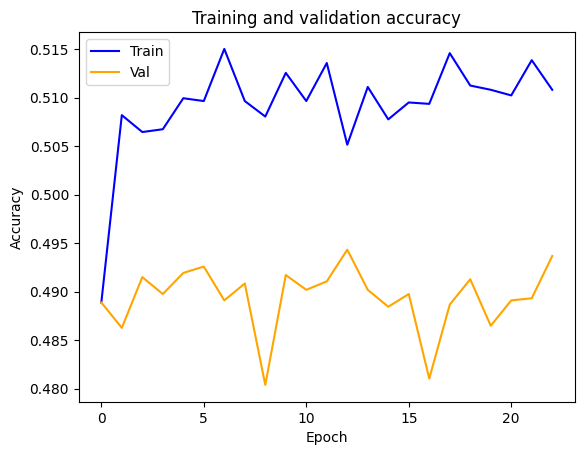

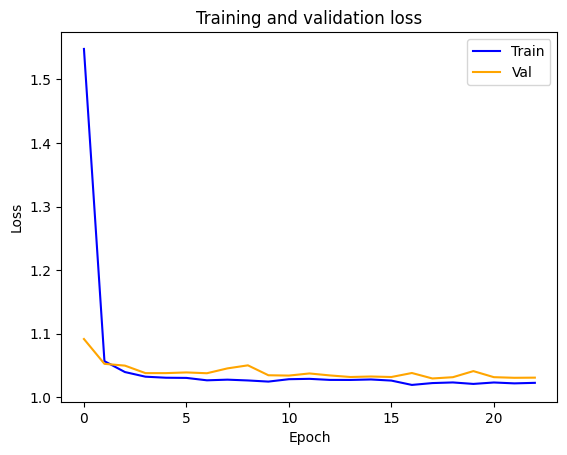

In [ ]:
import matplotlib.pyplot as plt

def plot(history):
  
  # The history object contains results on the training and test
  # sets for each epoch
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  # Get the number of epochs
  epochs = range(len(acc))

  plt.title('Training and validation accuracy')
  plt.plot(epochs, acc, color='blue', label='Train')
  plt.plot(epochs, val_acc, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend()

  _ = plt.figure()
  plt.title('Training and validation loss')
  plt.plot(epochs, loss, color='blue', label='Train')
  plt.plot(epochs, val_loss, color='orange', label='Val')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend()

plot(history)


In [ ]:
def match_names(name : str) :
        name = name.lower()
        closest_approximation = ""
        greatest_value = -1

        for club in all_clubs :
            ratio = fuzz.ratio(name, club.lower())
            partial_ratio = fuzz.partial_ratio(name, club.lower())

            value = ratio * 0.6 + partial_ratio * 0.4

            if (value > greatest_value) :
                greatest_value = value
                closest_approximation = club 

        if (greatest_value < 35) : return None
        else : return closest_approximation

print(match_names('Leipzig'), ', ', match_names('Atatata'), ', ', match_names('Man City'), sep="")

RasenBallsport Leipzig, Atalanta, Manchester City


In [ ]:
def predict(home_team, away_team) :
    home_team = match_names(home_team)
    away_team = match_names(away_team)
    input = []

    input.append(all_club_dict[home_team].summarize_last_5() 
            + all_club_dict[home_team].summarize_last_10() 
            + all_club_dict[home_team].summarize_last_15()
            + all_club_dict[home_team].summarize_last_25()
            + all_club_dict[home_team].summarize_last_38() 
            + all_club_dict[away_team].summarize_last_5()
            + all_club_dict[away_team].summarize_last_10()
            + all_club_dict[away_team].summarize_last_15()
            + all_club_dict[away_team].summarize_last_25()
            + all_club_dict[away_team].summarize_last_38()
        )
    
    prediction = model.predict(input)

    print('DRAW chance:', "{:.2f}".format(prediction[0][0] * 100))
    print(home_team, 'WIN chance:', "{:.2f}".format(prediction[0][1] * 100))
    print(away_team, 'WIN chance:', "{:.2f}".format(prediction[0][2] * 100))

In [ ]:
import builtins

print("Football Match Prediction:\n")
pred_home_team = builtins.input('Home Team:')
print('You entered:', match_names(pred_home_team))
pred_away_team = builtins.input('Away Team:')
print('You entered:',  match_names(pred_away_team))
predict(pred_home_team, pred_away_team)

Football Match Prediction:

You entered: Manchester City
You entered: Manchester United
1/1 [==============================] - 0s 47ms/step
DRAW chance: 21.34
Manchester City WIN chance: 64.90
Manchester United WIN chance: 13.76


CODE FOR SAVING DATA AND QUICKLY GETTING INTO PREDICTIONS

In [ ]:
model.save('./prediction_model')

In [ ]:
save_clubs = {}

for club in all_clubs :
    save_clubs[club] = [all_club_dict[club].last_5, all_club_dict[club].last_10, all_club_dict[club].last_15, all_club_dict[club].last_25, all_club_dict[club].last_38]

np.save('clubs_stats_for_predictions', save_clubs)

RUN FOLLOWING TO QUICKLY GET INTO PREDICTIONS

In [1]:
pip install fuzzywuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import requests
from bs4 import BeautifulSoup
import tensorflow as tf
import json
import numpy as np
from fuzzywuzzy import fuzz

# links
understat = {
    'match_link': 'https://understat.com/match/',
    '22/23': {
        'EPL': 'https://understat.com/league/EPL/2022',
        'Serie A': 'https://understat.com/league/Serie_A/2022',
        'La liga': 'https://understat.com/league/La_liga/2022',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2022',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2022'
    }, 
    '21/22': {
        'EPL': 'https://understat.com/league/EPL/2021',
        'Serie A': 'https://understat.com/league/Serie_A/2021',
        'La liga': 'https://understat.com/league/La_liga/2021',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2021',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2021'
    },
    '20/21': {
        'EPL': 'https://understat.com/league/EPL/2020',
        'Serie A': 'https://understat.com/league/Serie_A/2020',
        'La liga': 'https://understat.com/league/La_liga/2020',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2020',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2020'
    },
    '19/20': {
        'EPL': 'https://understat.com/league/EPL/2019',
        'Serie A': 'https://understat.com/league/Serie_A/2019',
        'La liga': 'https://understat.com/league/La_liga/2019',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2019',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2019'
    },
    '18/19': {
        'EPL': 'https://understat.com/league/EPL/2018',
        'Serie A': 'https://understat.com/league/Serie_A/2018',
        'La liga': 'https://understat.com/league/La_liga/2018',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2018',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2018'
    },
    '17/18': {
        'EPL': 'https://understat.com/league/EPL/2018',
        'Serie A': 'https://understat.com/league/Serie_A/2017',
        'La liga': 'https://understat.com/league/La_liga/2017',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2017',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2017'
    },
    '16/17': {
        'EPL': 'https://understat.com/league/EPL/2016',
        'Serie A': 'https://understat.com/league/Serie_A/2016',
        'La liga': 'https://understat.com/league/La_liga/2016',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2016',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2016'
    },
    '15/16': {
        'EPL': 'https://understat.com/league/EPL/2015',
        'Serie A': 'https://understat.com/league/Serie_A/2015',
        'La liga': 'https://understat.com/league/La_liga/2015',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2015',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2015'
    },
    '14/15': {
        'EPL': 'https://understat.com/league/EPL/2014',
        'Serie A': 'https://understat.com/league/Serie_A/2014',
        'La liga': 'https://understat.com/league/La_liga/2014',
        'Bundesliga': 'https://understat.com/league/Bundesliga/2014',
        'Ligue 1': 'https://understat.com/league/Ligue_1/2014'
    },
}
# enums
HOME, AWAY = 0, 1
DRAW, WON, LOST = 0, 1, 2
W_PTS, D_PTS, L_PTS = 3, 1, 0

/usr/local/lib/python3.8/dist-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [5]:
class Club :
    def __init__(self, club : str) :
        self.last_5, self.last_10, self.last_15, self.last_25, self.last_38 = [], [], [], [], []
        self.club = club

In [6]:
def get_all_clubs(url) :
    clubs = []
    res = requests.get(url)

    soup = BeautifulSoup(res.content, 'lxml')
    scripts = soup.find_all('script')
    strings = scripts[1].string

    ind_start = strings.index("('") + 2
    ind_end = strings.index("')")

    json_data = strings[ind_start : ind_end]
    json_data = json_data.encode('utf8').decode('unicode_escape')

    data = json.loads(json_data)
    for i in range(10) :
        clubs.append(data[i]['h']['title'])
        clubs.append(data[i]['a']['title'])
    return set(clubs)

all_clubs = []
for key, value in understat.items() :
    if (key == 'match_link') : continue
    for name, link in value.items() :
        all_clubs = all_clubs + list(get_all_clubs(link))
all_clubs = set(all_clubs)

all_club_dict = {}

for club in all_clubs :
    all_club_dict[club] = Club(club)

In [7]:
model = tf.keras.models.load_model('./prediction_model')
loaded_clubs = np.load('clubs_stats_for_predictions.npy', allow_pickle=True).item()

for club in all_clubs :
    all_club_dict[club].last_5 = loaded_clubs[club][0][0]
    all_club_dict[club].last_10 = loaded_clubs[club][0][1]
    all_club_dict[club].last_15 = loaded_clubs[club][0][2]
    all_club_dict[club].last_25 = loaded_clubs[club][0][3]
    all_club_dict[club].last_38 = loaded_clubs[club][0][4]



In [8]:
def match_names(name : str) :
        name = name.lower()
        closest_approximation = ""
        greatest_value = -1

        for club in all_clubs :
            ratio = fuzz.ratio(name, club.lower())
            partial_ratio = fuzz.partial_ratio(name, club.lower())

            value = ratio * 0.6 + partial_ratio * 0.4

            if (value > greatest_value) :
                greatest_value = value
                closest_approximation = club 

        if (greatest_value < 35) : return None
        else : return closest_approximation

In [9]:
def predict(home_team, away_team) :
    home_team = match_names(home_team)
    away_team = match_names(away_team)
    input = []

    input.append(all_club_dict[home_team].last_5 
            + all_club_dict[home_team].last_10
            + all_club_dict[home_team].last_15
            + all_club_dict[home_team].last_25
            + all_club_dict[home_team].last_38 
            + all_club_dict[away_team].last_5
            + all_club_dict[away_team].last_10
            + all_club_dict[away_team].last_15
            + all_club_dict[away_team].last_25
            + all_club_dict[away_team].last_38
        )
    prediction = model.predict(input)

    print('DRAW chance:', "{:.2f}".format(prediction[0][0] * 100))
    print(home_team, 'WIN chance:', "{:.2f}".format(prediction[0][1] * 100))
    print(away_team, 'WIN chance:', "{:.2f}".format(prediction[0][2] * 100))

In [14]:
import builtins

print("Football Match Prediction:\n")
pred_home_team = builtins.input('Home Team:')
print('You entered:', match_names(pred_home_team))
pred_away_team = builtins.input('Away Team:')
print('You entered:',  match_names(pred_away_team))
predict(pred_home_team, pred_away_team)

Football Match Prediction:

Home Team:Barcelona
You entered: Barcelona
Away Team:Real Madrid
You entered: Real Madrid
1/1 [==============================] - 0s 45ms/step
DRAW chance: 26.68
Barcelona WIN chance: 30.15
Real Madrid WIN chance: 43.17
